In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import random_split
import torch
import os

In [13]:
data_path = r"C:\Users\matth\Desktop\data"
os.chdir(data_path)
data = xr.open_dataset('l3_blended_l4_extracts_gR_201701.nc')
data

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
http://xarray.pydata.org/en/stable/user-guide/io.html 
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html

In [140]:
df_L4 = data.sstL4.data # convert to numpy
df_gr = data.gRsst.data
N_data = len(df_L4)
N_pixels = len(df_L4[0,0])
df = np.array((df_L4,df_gr)) # df[type, tile, x, y] where type = 0 (l4) or 1 (gr) gives the temp at a point in a tile.

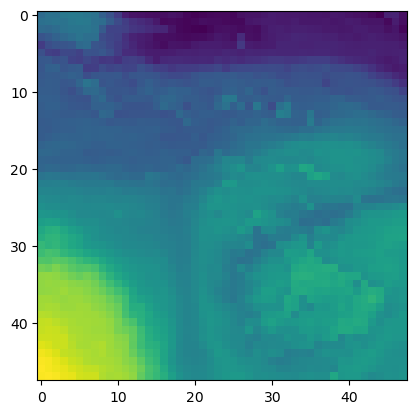

In [133]:
plt.imshow(df[1,0]) # plot first tile in gr dataset

Text(0.5, 1.0, 'Mean in tile')

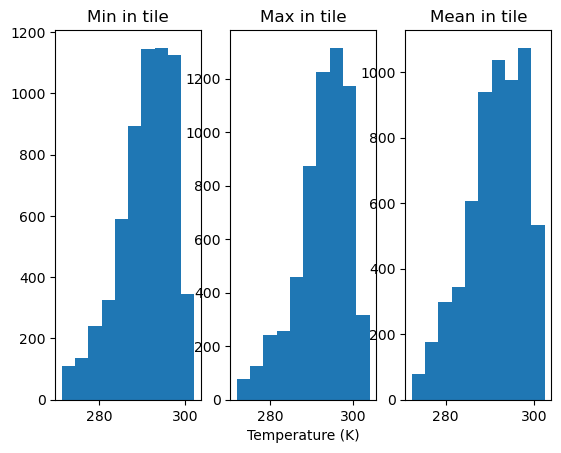

In [138]:
## check temperature values are normal
min = 1E10
max = 0
min_array = np.zeros(N_data)
max_array = np.zeros(N_data) 
mean_array = np.zeros(N_data)
for i in range(N_data):
    mean_array[i] = np.mean(df[1,i])
    for j in range(N_pixels): 
        min_array[i] = np.min(df[1,i,j])
        max_array[i] = np.max(df[1,i,j])
fig, ax = plt.subplots(1,3)
ax[0].hist(min_array)
ax[0].set_title('Min in tile') 
ax[1].hist(max_array)
ax[1].set_title('Max in tile')
ax[1].set_xlabel('Temperature (K)')
ax[2].hist(mean_array)
ax[2].set_title('Mean in tile')

In [131]:
# train_percent, val_percent, test_precent = 0.75, 0.15, 0.1
# gen = torch.Generator().manual_seed(100) # random generator algorithm
# train_dataset, val_dataset, test_dataset = random_split(df[0], (train_percent, val_percent, test_percent), generator = gen)